In [7]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import mat73
from skimage.transform import radon, iradon
from scipy.ndimage import convolve

In [2]:
data1 = mat73.loadmat("/mnt/c/Users/ankku/Documents/IITB Lectures and Study Material/Sem6/CS736/assignmentMathImagingRecon/data/assignmentMathImagingRecon_chestCT.mat")
data2 = mat73.loadmat("/mnt/c/Users/ankku/Documents/IITB Lectures and Study Material/Sem6/CS736/assignmentMathImagingRecon/data/assignmentMathImagingRecon_myPhantom.mat")
data1, data2

({'imageAC': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], shape=(512, 512))},
 {'ans': array(1.),
  'imageMyPhantomAC': array([[5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
          5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
         [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
          5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
         [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
          5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
         ...,
         [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
          5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
         [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
          5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
         [5.17689712e-17, 5.17689712e-17, 5.176897

In [5]:
chestCT = data1['imageAC']
myPhantom = data2['imageMyPhantomAC']

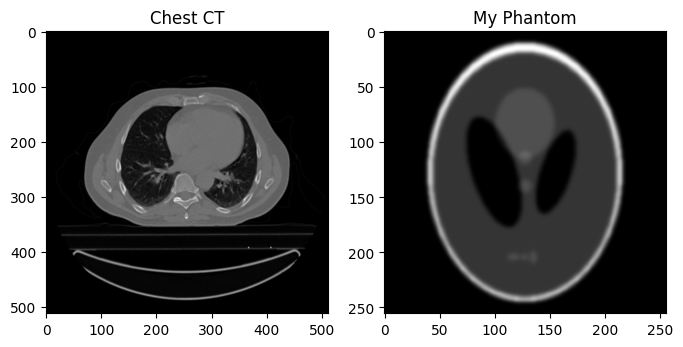

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(chestCT, cmap='gray')
ax[0].set_title("Chest CT")
ax[1].imshow(myPhantom, cmap='gray')
ax[1].set_title("My Phantom")
plt.show()

(a)

In [8]:
def compute_rrmse(A, B):
    return np.sqrt(np.sum((A - B)**2)) / np.sqrt(np.sum(A**2))

In [ ]:
theta0_vals = np.arange(0, 181, 1) 
n_angles_acquired = 151 

rrmse_chest = []
rrmse_phantom = []

for theta0 in theta0_vals:
    angles = (theta0 + np.arange(n_angles_acquired)) % 180
    
    sino_chest = radon(chestCT, theta=angles, circle=True)
    recon_chest = iradon(sino_chest, theta=angles, filter_name="ramp", circle=True)
    rrmse_val_chest = compute_rrmse(chestCT, recon_chest)
    rrmse_chest.append(rrmse_val_chest)
    
    sino_phantom = radon(myPhantom, theta=angles, circle=True)
    recon_phantom = iradon(sino_phantom, theta=angles, filter_name="ramp", circle=True)
    rrmse_val_phantom = compute_rrmse(myPhantom, recon_phantom)
    rrmse_phantom.append(rrmse_val_phantom)

rrmse_chest = np.array(rrmse_chest)
rrmse_phantom = np.array(rrmse_phantom)


/home/ank/env/lib/python3.12/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


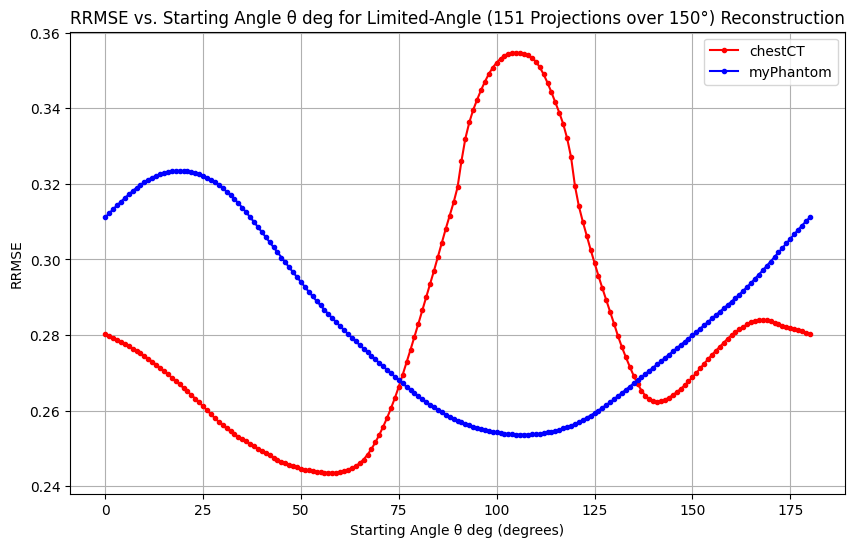

In [13]:
plt.figure(figsize=(10,6))
plt.plot(theta0_vals, rrmse_chest, 'r.-', label='chestCT')
plt.plot(theta0_vals, rrmse_phantom, 'b.-', label='myPhantom')
plt.xlabel('Starting Angle θ deg (degrees)')
plt.ylabel('RRMSE')
plt.title('RRMSE vs. Starting Angle θ deg for Limited-Angle (151 Projections over 150°) Reconstruction')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
opt_index_chest = np.argmin(rrmse_chest)
opt_theta0_chest = theta0_vals[opt_index_chest]
print("Optimal angle for chestCT (Starting angle for Lowest RRMSE):", opt_theta0_chest, "degrees")

Optimal angle for chestCT (Starting angle for Lowest RRMSE): 57 degrees


In [17]:
opt_index_phantom = np.argmin(rrmse_phantom)
opt_theta0_phantom = theta0_vals[opt_index_phantom]
print("Optimal angle for myPhantom (Starting angle for Lowest RRMSE):", opt_theta0_phantom, "degrees")

Optimal angle for myPhantom (Starting angle for Lowest RRMSE): 107 degrees


(b)

In [18]:
angles_opt_chest = (opt_theta0_chest + np.arange(n_angles_acquired)) % 180
sino_opt_chest = radon(chestCT, theta=angles_opt_chest, circle=True)
recon_opt_chest = iradon(sino_opt_chest, theta=angles_opt_chest, filter_name="ramp", circle=True)

angles_opt_phantom = (opt_theta0_phantom + np.arange(n_angles_acquired)) % 180
sino_opt_phantom = radon(myPhantom, theta=angles_opt_phantom, circle=True)
recon_opt_phantom = iradon(sino_opt_phantom, theta=angles_opt_phantom, filter_name="ramp", circle=True)


/home/ank/env/lib/python3.12/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


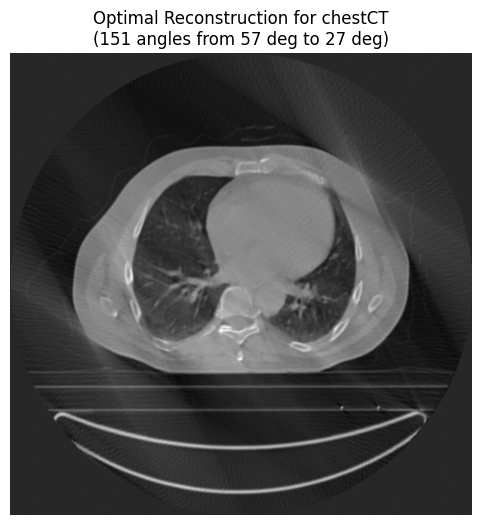

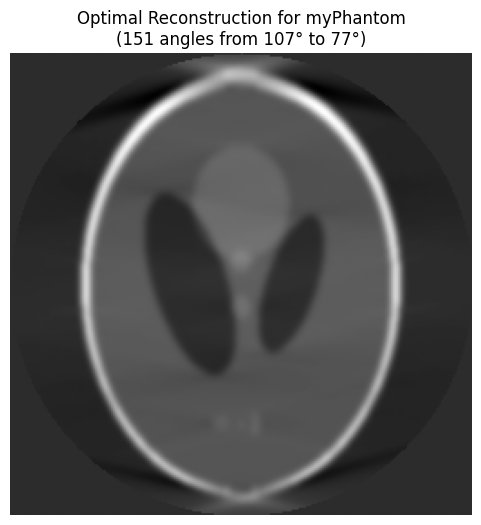

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(recon_opt_chest, cmap='gray')
plt.title(f"Optimal Reconstruction for chestCT\n(151 angles from {opt_theta0_chest} deg to {(opt_theta0_chest + n_angles_acquired - 1) % 180} deg)")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(recon_opt_phantom, cmap='gray')
plt.title(f"Optimal Reconstruction for myPhantom\n(151 angles from {opt_theta0_phantom}° to {(opt_theta0_phantom + n_angles_acquired - 1) % 180}°)")
plt.axis('off')
plt.show()
